# Linear Regression

Submission to "How to Make a Prediction - Intro to Deep Learning 1" by Siraj Raval on YouTube

In [1]:
%matplotlib inline

# Imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np

## Regression with 2 variables

### 1. Import and visualize data

In [2]:
df = pd.read_csv('challenge_dataset.txt', names=['X','Y'])

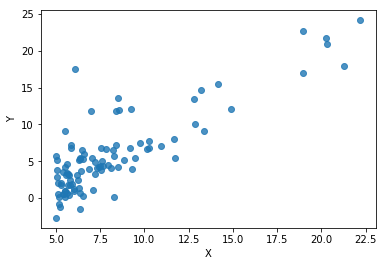

In [3]:
sns.regplot(x='X', y='Y', data=df, fit_reg=False)
plt.show()

### 2. 2D Regression

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = np.asarray(train_test_split(df['X'], df['Y'], test_size=0.1))

In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
print('Score: ', reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1)))

Score:  0.7400867946777501


### 3. Plot regression and visualize results

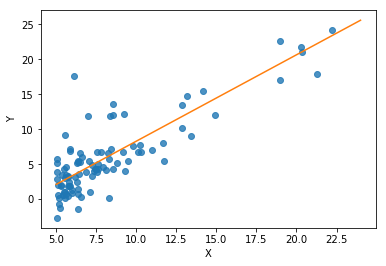

In [7]:
x_line = np.arange(5,25).reshape(-1,1)
sns.regplot(x=df['X'], y=df['Y'], data=df, fit_reg=False)
plt.plot(x_line, reg.predict(x_line))
plt.show()

## 3 Variables

### 1. Data preprocessing

In [8]:
# Import data
co2_df = pd.read_csv('global_co2.csv')
temp_df = pd.read_csv('annual_temp.csv')
print(co2_df.head())
print(temp_df.head())

   Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
0  1751      3         0            0           3       0            0   
1  1752      3         0            0           3       0            0   
2  1753      3         0            0           3       0            0   
3  1754      3         0            0           3       0            0   
4  1755      3         0            0           3       0            0   

   Per Capita  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
    Source  Year    Mean
0     GCAG  2015  0.8990
1  GISTEMP  2015  0.8700
2     GCAG  2014  0.7402
3  GISTEMP  2014  0.7500
4     GCAG  2013  0.6687


In [9]:
# Clean data
co2_df = co2_df.ix[:,:2]                     # Keep only total CO2
co2_df = co2_df.ix[co2_df['Year'] >= 1960]   # Keep only 1960 - 2010
co2_df.columns=['Year','CO2']                # Rename columns
co2_df = co2_df.reset_index(drop=True)                # Reset index

temp_df = temp_df[temp_df.Source != 'GISTEMP']                              # Keep only one source
temp_df.drop('Source', inplace=True, axis=1)                                # Drop name of source
temp_df = temp_df.reindex(index=temp_df.index[::-1])                        # Reset index
temp_df = temp_df.ix[temp_df['Year'] >= 1960].ix[temp_df['Year'] <= 2010]   # Keep only 1960 - 2010
temp_df.columns=['Year','Temperature']                                      # Rename columns
temp_df = temp_df.reset_index(drop=True)                                             # Reset index

print(co2_df.head())
print(temp_df.head())

   Year   CO2
0  1960  2569
1  1961  2580
2  1962  2686
3  1963  2833
4  1964  2995
   Year  Temperature
0  1960       0.0252
1  1961       0.0818
2  1962       0.0924
3  1963       0.1100
4  1964      -0.1461


C:\Users\gollo\Miniconda3\envs\tarea2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\gollo\Miniconda3\envs\tarea2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gollo\Miniconda3\envs\tarea2\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-depr

In [10]:
# Concatenate
climate_change_df = pd.concat([co2_df, temp_df.Temperature], axis=1)

print(climate_change_df.head())

   Year   CO2  Temperature
0  1960  2569       0.0252
1  1961  2580       0.0818
2  1962  2686       0.0924
3  1963  2833       0.1100
4  1964  2995      -0.1461


### 2. Vizualize initial data

#### 3D Plot

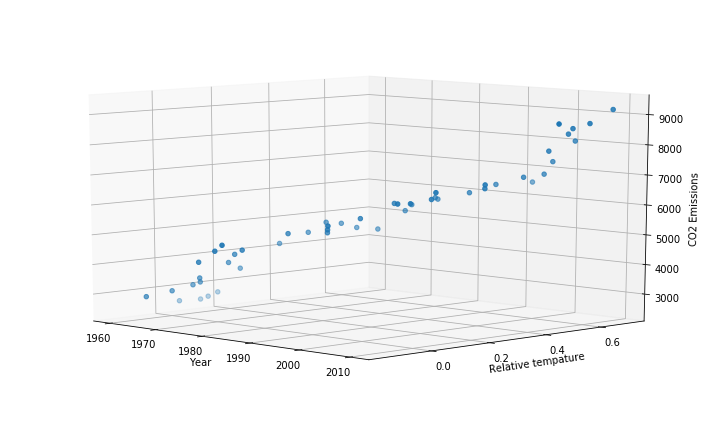

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])

ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.view_init(10, -45)

#### Projected 2D plots

Text(0,0.5,'Relative temperature')

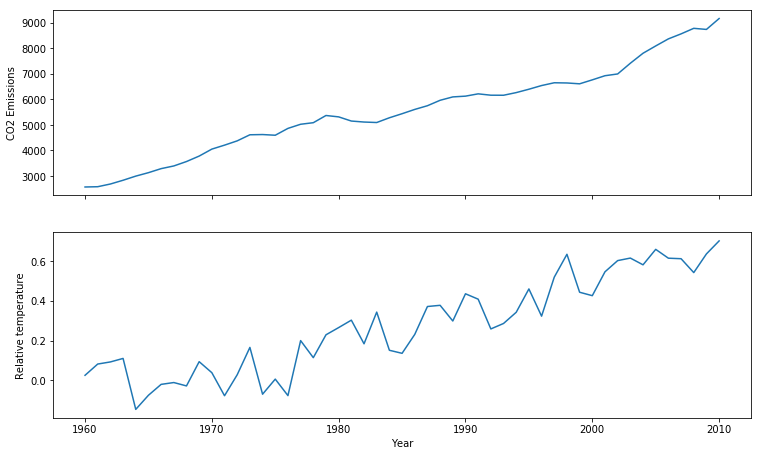

In [19]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')

### 3. Linear Regression

In [13]:
X = climate_change_df.as_matrix(['Year'])
Y = climate_change_df.as_matrix(['CO2', 'Temperature']).astype('float32')

X_train, X_test, y_train, y_test = np.asarray(train_test_split(X, Y, test_size=0.1))

C:\Users\gollo\Miniconda3\envs\tarea2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\gollo\Miniconda3\envs\tarea2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [14]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print('Score: ', reg.score(X_test.reshape(-1, 1), y_test))

Score:  0.8935571353844441


### 4. Plot regression and visualize results

In [16]:
x_line = np.arange(1960,2011).reshape(-1,1)
p = reg.predict(x_line).T

#### 3D Plot

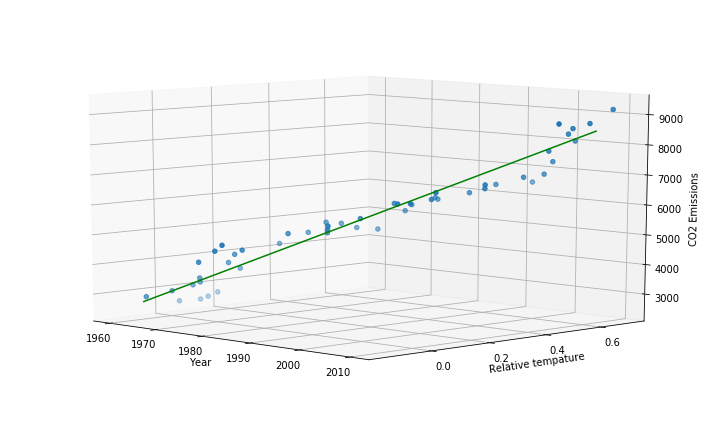

In [17]:
fig2 = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(xs=climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])
ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.plot(xs=x_line, ys=p[1], zs=p[0], color='green')
ax.view_init(10, -45)

#### Projected 2D plots

Text(0,0.5,'Relative temperature')

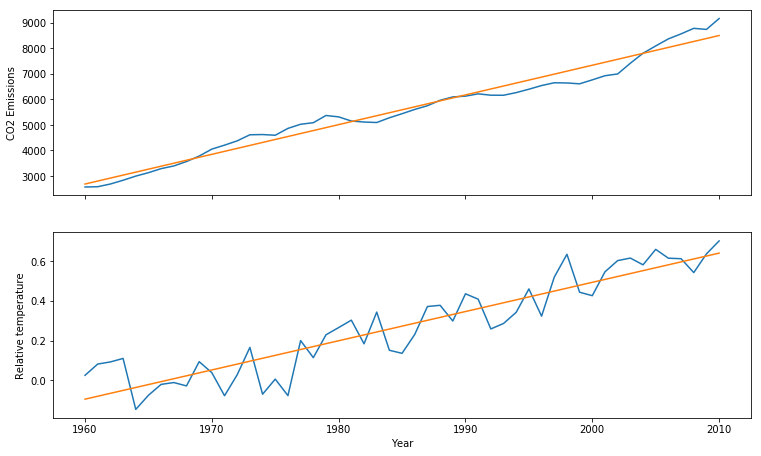

In [18]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].plot(x_line, p[0])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].plot(x_line, p[1])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')